## 2nd notebook InceptionV3

In [ ]:
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical


## 1. Load and Visualize Dataset

In [ ]:
# Load dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Visualize some examples
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']


In [ ]:
from collections import Counter

labels = y_train.ravel()

# Count the number of samples per class
class_counts = Counter(labels)

# Sort by class index
classes = sorted(class_counts.keys())
counts = [class_counts[c] for c in classes]


### 2. Data Preprocessing

Before training, we need to prepare our data to fit the model:
1. **Reshape** not needed
2. **Normalize** pixel values to the [0, 1] range to speed up training.
3. **Encode** the labels using one-hot encoding for categorical classification.

In [ ]:
from tensorflow.keras.utils import to_categorical

# normalize pixel values to 0 - 1
# reshaping is not necessary for CIFAR-10 as it is already in the correct shape
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [ ]:
# Resize images InceptionV3 expects minimum 75x75

def resize_images(images, size=(75, 75), batch_size=1000):
    resized = []
    for i in range(0, len(images), batch_size):
        batch = images[i:i + batch_size]
        batch_resized = tf.image.resize(batch, size).numpy()
        resized.append(batch_resized)
    return np.concatenate(resized)

IMG_SIZE = 75
X_train_resized = resize_images(X_train, size=(IMG_SIZE, IMG_SIZE))
X_test_resized = resize_images(X_test, size=(IMG_SIZE, IMG_SIZE))

In [ ]:
# One-Hot Encode Labels
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

y_train_cat = to_categorical(y_train, num_classes=10)
y_test_cat = to_categorical(y_test, num_classes=10)

In [ ]:
# Load Pre-trained InceptionV3
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras import layers, models

# Load pre-trained InceptionV3 Model
base_model = InceptionV3(include_top=False, weights='imagenet', input_shape=(IMG_SIZE, IMG_SIZE, 3))

# Add custom classifier on top
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),   # Pool spatial features into a vector
    Dense(300, activation='relu'),  # Fully connected layer to learn new patterns
    Dense(10, activation='softmax')  # Output layer with 10 classes
])

In [ ]:
#Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001),   #between 0.0001 and 0.01, the best one 0.0001
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train_resized, y_train_cat,
                    epochs=10,
                    batch_size=64,
                    validation_data=(X_test_resized, y_test_cat))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 126s 78ms/step - accuracy: 0.5526 - loss: 1.2904 - val_accuracy: 0.8344 - val_loss: 0.4945
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.8769 - loss: 0.3682 - val_accuracy: 0.8574 - val_loss: 0.4207
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9306 - loss: 0.2057 - val_accuracy: 0.8714 - val_loss: 0.4106
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 31ms/step - accuracy: 0.9559 - loss: 0.1318 - val_accuracy: 0.8744 - val_loss: 0.4235
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9671 - loss: 0.0944 - val_accuracy: 0.8801 - val_loss: 0.4152
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9748 - loss: 0.0752 - val_accuracy: 0.8795 - val_loss: 0.4584
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9771 - loss: 0.0675 - val_accuracy: 0.8823 - val_loss: 0.4499
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 30ms/step - accuracy: 0.9830 - loss: 0.0499 -

In [ ]:
# Evaluate the model
# Accuracy

test_loss, test_acc = model.evaluate(X_test_resized, y_test_cat)
print(f"Test Accuracy: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - accuracy: 0.8881 - loss: 0.4687
Test Accuracy: 0.8874


In [ ]:
# Predictions
# Predict probabilities
y_pred_probs = model.predict(X_test_resized)

313/313 ━━━━━━━━━━━━━━━━━━━━ 12s 23ms/step


In [ ]:
# Convert probabilities to class labels
y_pred = np.argmax(y_pred_probs, axis=1)

In [ ]:
y_test.shape

(10000,)

In [ ]:
y_test_flat = y_test.reshape(-1)  # In case it's (10000, 1)

In [ ]:
# Classification Report
from sklearn.metrics import classification_report
report = classification_report(y_test_flat,y_pred, target_names=class_names)
print(report)

              precision    recall  f1-score   support

    airplane       0.92      0.89      0.90      1000
  automobile       0.95      0.93      0.94      1000
        bird       0.88      0.86      0.87      1000
         cat       0.77      0.83      0.80      1000
        deer       0.84      0.90      0.87      1000
         dog       0.88      0.76      0.81      1000
        frog       0.90      0.94      0.92      1000
       horse       0.94      0.89      0.91      1000
        ship       0.90      0.95      0.93      1000
       truck       0.92      0.92      0.92      1000

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



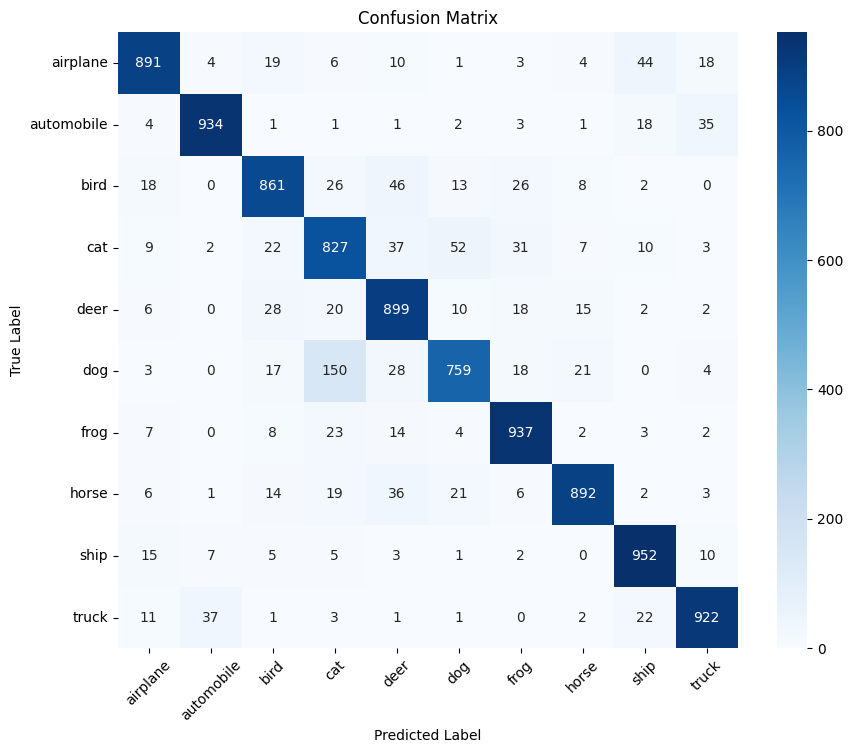

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

**DATA AUGMENTATION**

In [ ]:
#1
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    zoom_range=0.1
)

In [ ]:
datagen.fit(X_train_resized)

In [ ]:
history = model.fit(
    datagen.flow(X_train_resized, y_train_cat, batch_size=64),
    epochs=20,
    validation_data=(X_test_resized, y_test_cat)
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 128ms/step - accuracy: 0.8913 - loss: 0.3411 - val_accuracy: 0.9012 - val_loss: 0.2992
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9177 - loss: 0.2433 - val_accuracy: 0.9032 - val_loss: 0.2991
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.9340 - loss: 0.1985 - val_accuracy: 0.9105 - val_loss: 0.2725
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9388 - loss: 0.1827 - val_accuracy: 0.9115 - val_loss: 0.2771
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9470 - loss: 0.1612 - val_accuracy: 0.9114 - val_loss: 0.2746
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9481 - loss: 0.1502 - val_accuracy: 0.9123 - val_loss: 0.2717
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9524 - loss: 0.1389 - val_accuracy: 0.9120 - val_loss: 0.2813
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 96ms/step - accuracy: 0.9542 - loss: 0.1358 

In [ ]:
#how many layers Inception V3 has?
print(len(base_model.layers))

311


In [ ]:
#2
#Tuning

# Unfreeze some top layers of base model
base_model.trainable = True

# Optionally, freeze the bottom N layers to avoid overfitting

for layer in base_model.layers[:249]: # freezing bottom
    layer.trainable = False


# Recompile the model with a lower learning rate
from tensorflow.keras.optimizers import Adam

model.compile(optimizer=Adam(learning_rate=1e-5),  # Lower learning rate
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
# Continue training
history_finetune = model.fit(
    datagen.flow(X_train_resized, y_train_cat, batch_size=64),
    epochs=10,
    validation_data=(X_test_resized, y_test_cat)
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 114s 117ms/step - accuracy: 0.9760 - loss: 0.0689 - val_accuracy: 0.9234 - val_loss: 0.2803
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.9782 - loss: 0.0645 - val_accuracy: 0.9245 - val_loss: 0.2770
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.9822 - loss: 0.0524 - val_accuracy: 0.9259 - val_loss: 0.2757
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 94ms/step - accuracy: 0.9830 - loss: 0.0504 - val_accuracy: 0.9260 - val_loss: 0.2756
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.9833 - loss: 0.0475 - val_accuracy: 0.9254 - val_loss: 0.2775
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 95ms/step - accuracy: 0.9852 - loss: 0.0441 - val_accuracy: 0.9258 - val_loss: 0.2778
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.9859 - loss: 0.0453 - val_accuracy: 0.9262 - val_loss: 0.2775
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 74s 94ms/step - accuracy: 0.9836 - loss: 0.0467 

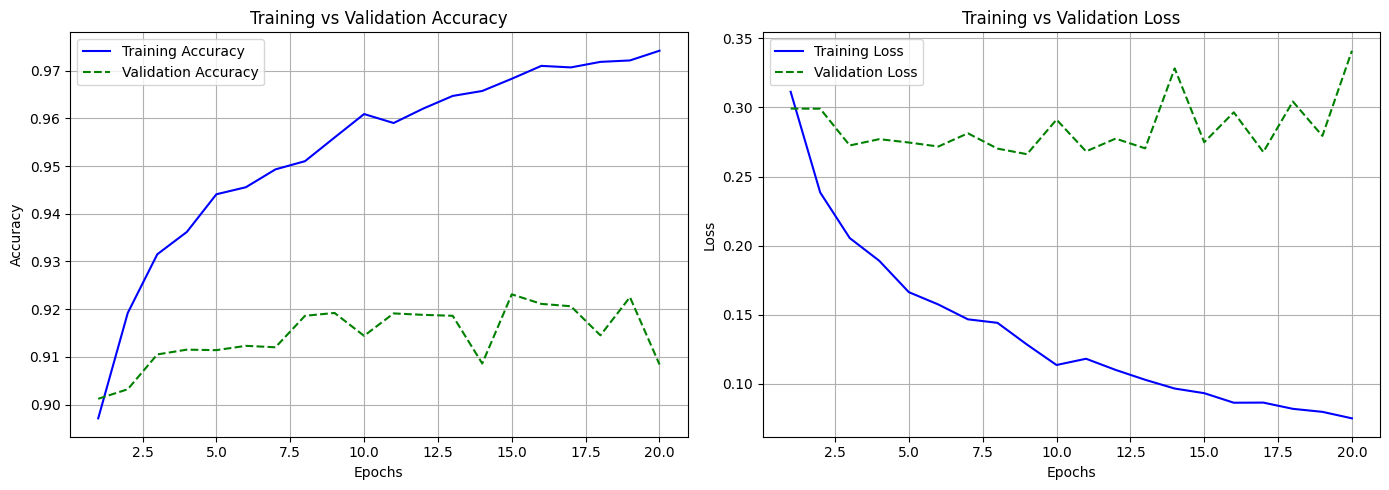

In [ ]:
import matplotlib.pyplot as plt

# Extract accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

# Plot accuracy
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'g--', label='Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b-', label='Training Loss')
plt.plot(epochs, val_loss, 'g--', label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [ ]:
# Avoiding overfitting - new training

model_2 = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.5),  # Dropout with 50% rate
    Dense(300, activation='relu'),
    Dense(10, activation='softmax')
])

In [ ]:
model_2.compile(optimizer=Adam(learning_rate=0.0001),
                loss='categorical_crossentropy',
                metrics=['accuracy'])


In [ ]:
history_2 = model_2.fit(
    X_train_resized, y_train_cat,
    validation_data=(X_test_resized, y_test_cat),
    epochs=10,
    batch_size=64
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 51s 36ms/step - accuracy: 0.9284 - loss: 0.3320 - val_accuracy: 0.9267 - val_loss: 0.3067
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9971 - loss: 0.0103 - val_accuracy: 0.9257 - val_loss: 0.3645
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9983 - loss: 0.0071 - val_accuracy: 0.9284 - val_loss: 0.3841
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9991 - loss: 0.0035 - val_accuracy: 0.9264 - val_loss: 0.4301
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9990 - loss: 0.0043 - val_accuracy: 0.9288 - val_loss: 0.4244
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9993 - loss: 0.0025 - val_accuracy: 0.9277 - val_loss: 0.4590
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9995 - loss: 0.0017 - val_accuracy: 0.9263 - val_loss: 0.5043
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.9984 - loss: 0.0051 - 

In [ ]:
# Evaluate
test_loss, test_acc = model_2.evaluate(X_test_resized, y_test_cat)
print(f"Test Accuracy with Dropout: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.9256 - loss: 0.5327
Test Accuracy with Dropout: 0.9261
